<a href="https://colab.research.google.com/github/JULIOARMANDOG/PRY_FINAL_MAESTRIA/blob/main/LTSM_ProyectoFinal_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from collections import Counter
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout,Input
from keras.optimizers import SGD
from keras.utils import plot_model

In [8]:
zip_path='uci-har.zip'
with zipfile.ZipFile(zip_path,'r') as zipRef:
  zipRef.extractall('sample_data/')


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7332 - loss: 1.0414
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9582 - loss: 0.1378
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9678 - loss: 0.0952
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9731 - loss: 0.0799
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9764 - loss: 0.0669
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9734 - loss: 0.0706
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9760 - loss: 0.0681
Epoch 8/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9845 - loss: 0.0452
Epoch 9/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9820 - loss: 0.0505
Epoch 10/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9837 - loss: 0.0520
Epoch 11/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9856 - loss: 0.0420
Epoch 12/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 50)          │       122,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 428,720 (1.64 MB)

 Trainable params: 142,906 (558.23 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 285,814 (1.09 MB)

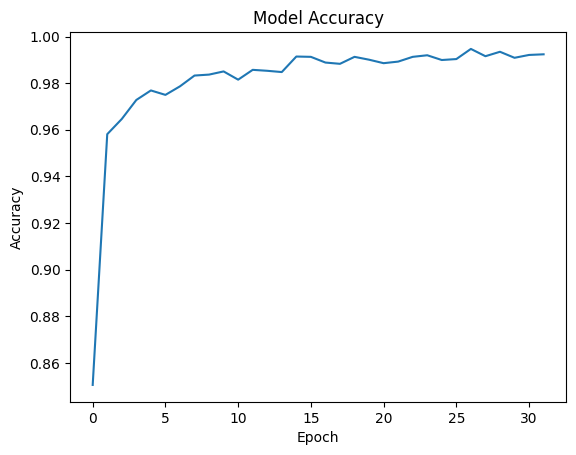

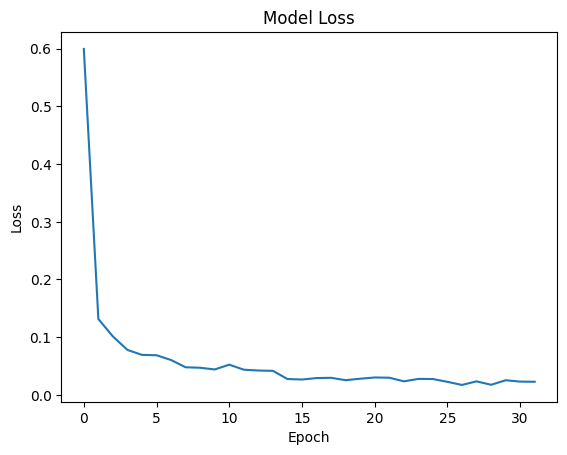

In [9]:
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

# Load data
X_train = np.loadtxt("sample_data/uci-har/train/X_train.txt")
y_train = np.loadtxt("sample_data/uci-har/train/y_train.txt")

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Reshape data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

# One-hot encode the labels
y_train = to_categorical(y_train - 1) # Adjust labels to be 0-indexed

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[early_stopping])

# Print the model summary
model.summary()

# Optional: Plot training history
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [10]:
# prompt: EVALUA EL MODELO CON X TEST Y Y TEST DE LA CARPETA UCI-HAR

# Load test data
X_test = np.loadtxt("sample_data/uci-har/test/X_test.txt")
y_test = np.loadtxt("sample_data/uci-har/test/y_test.txt")

# Normalize test data using the same scaler fitted on training data
X_test = scaler.transform(X_test)

# Reshape test data for LSTM
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# One-hot encode the test labels
y_test = to_categorical(y_test - 1) # Adjust labels to be 0-indexed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Predict on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))

Test loss: 0.2494
Test accuracy: 0.9450
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       496
           1       0.93      0.95      0.94       471
           2       0.98      0.90      0.94       420
           3       0.95      0.88      0.91       491
           4       0.88      0.96      0.92       532
           5       1.00      0.98      0.99       537

    accuracy                           0.95      2947
   macro avg       0.95      0.94      0.94      2947
weighted avg       0.95      0.95      0.95      2947


Confusion Matrix:
[[488   4   4   0   0   0]
 [ 16 449   5   0   1   0]
 [  8  32 380   0   0   0]
 [  0   0   0 432  57   2]
 [  0   0   0  22 510   0]
 [  0   0   0   0  11 526]]


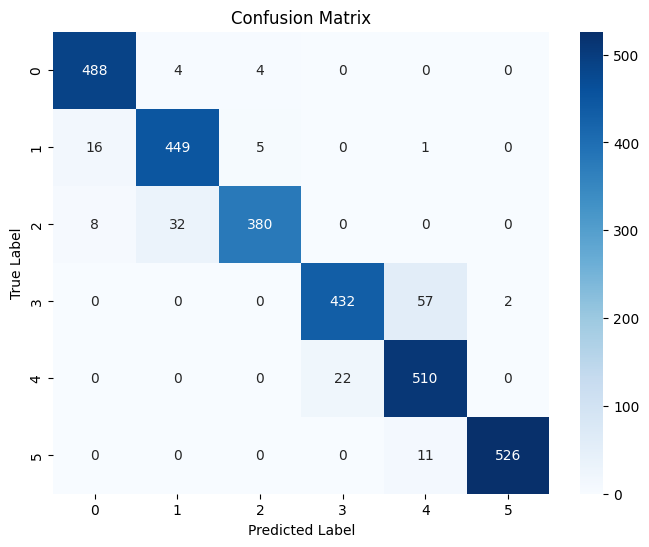

In [11]:
# prompt: Dibujar la matriz de confusion

import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
